# Initial analysis of data post cleaning

In [83]:
import pickle
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [71]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


In [121]:
metro_delays = pickle.load( open( "metro_delays.p", "rb" ) )
bikeshare_rides = pickle.load( open( "bikeshare_rides.p", "rb" ) )
bikes_close = pickle.load( open( "bikes_close.p", "rb" ) )

In [122]:
print(type(metro_delays))
print(type(bikeshare_rides))
print(type(bikes_close))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'dict'>


What is the date range of my bikeshare data?

In [123]:
print(bikeshare_rides.index.min())
print(bikeshare_rides.index.max())

2016-07-01 00:00:00
2016-09-30 23:59:00


#### Limit metro_delays to the time period for which I have bike data and to those delays > 30 minutes

In [124]:
metro_delays = metro_delays[str(bikeshare_rides.index.min()) : str(bikeshare_rides.index.max())]
metro_delays = metro_delays[metro_delays['Delay'] >= 30]

In [125]:
metro_delays


,Date,Incident,Line,Direction,Cause,Delay,time_stamp
Time,,,,,,,
2016-09-23 16:00:00,9/23/2016,A Vienna-bound Orange Line train at Potomac A...,Orange,Vienna,a brake problem,38.0,9/23/2016 4:00 pm
2016-09-23 17:06:00,9/23/2016,A Largo Town Center-bound Blue Line train at ...,Blue,Largo Town Center,NaN,75.0,9/23/2016 5:06 pm
2016-09-22 06:04:00,9/22/2016,A Vienna-bound Orange Line train at New Carro...,Orange,Vienna,a brake problem,36.0,9/22/2016 6:04 am
2016-09-21 21:49:00,9/21/2016,A Shady Grove-bound Red Line train at Judicia...,Red,Shady Grove,signal problem,33.0,9/21/2016 9:49 pm
2016-09-17 07:00:00,9/17/2016,A Vienna-bound Orange Line train at New Carro...,Orange,Vienna,a 3rd rail power problem,32.0,9/17/2016 7:00 am
2016-09-14 05:10:00,9/14/2016,Green Line service was temporarily suspended ...,Green,NaN,a person struck by a train outside Suitland st...,30.0,9/14/2016 5:10 am
2016-09-13 22:04:00,9/13/2016,A Shady Grove-bound Red Line train at Farragu...,Red,Shady Grove,a signal problem,41.0,9/13/2016 10:04 pm
2016-09-11 23:43:00,9/11/2016,A Vienna-bound Orange Line train at Landover ...,Orange,Vienna,striking a deer,33.0,9/11/2016 11:43 pm
2016-09-07 22:29:00,9/7/2016,A Glenmont-bound Red Line train at NoMa-Galla...,Red,Glenmont,a brake problem,30.0,9/7/2016 10:29 pm


In [126]:
print(len(metro_delays))
print(len(metro_delays.dropna()))

39
32


Apparently 7 delays contain NaN's  
#### How many >30min delays does each line have?

In [127]:
metro_delays.groupby('Line').count()

,Date,Incident,Direction,Cause,Delay,time_stamp
Line,,,,,,
Blue,8,8,7,7,8,8
Green,2,2,1,2,2,2
Orange,12,12,12,11,12,12
Red,10,10,10,9,10,10
Silver,1,1,1,1,1,1
Yellow,4,4,4,4,4,4


Lets look a little closer at the Red line delays during the morning rush hour (6 - 9 am) (is it possible to slice by time of day?) try `red_delayed.index.hour`

In [108]:
red_delays = metro_delays[metro_delays['Line'] == 'Red']
red_delays

,Date,Incident,Line,Direction,Cause,Delay,time_stamp
Time,,,,,,,
2012-12-31 10:30:00,12/31/2012,A Grosvenor-bound Red Line train at Gallery P...,Red,Grosvenor,an equipment problem,6.0,12/31/2012 10:30 am
2012-12-31 19:38:00,12/31/2012,A Shady Grove-bound Red Line train at Fort To...,Red,Shady Grove,a brake problem,8.0,12/31/2012 7:38 pm
2012-12-31 23:32:00,12/31/2012,A Glenmont-bound Red Line train at Dupont Cir...,Red,Glenmont,a report of smoke,4.0,12/31/2012 11:32 pm
2012-12-30 12:24:00,12/30/2012,A Shady Grove-bound Red Line train at Takoma ...,Red,Shady Grove,a brake problem,27.0,12/30/2012 12:24 pm
2012-12-30 12:34:00,12/30/2012,A Glenmont-bound Red Line train at Union Stat...,Red,Glenmont,an equipment problem,6.0,12/30/2012 12:34 pm
2012-12-30 17:19:00,12/30/2012,A Silver Spring-bound Red Line train at Twinb...,Red,Silver Spring,an equipment problem,7.0,12/30/2012 5:19 pm
2012-12-30 18:39:00,12/30/2012,A Shady Grove-bound Red Line train at Metro C...,Red,Shady Grove,an operational problem,6.0,12/30/2012 6:39 pm
2012-12-29 10:21:00,12/29/2012,A Shady Grove-bound Red Line train at Metro C...,Red,Shady Grove,an operational problem,6.0,12/29/2012 10:21 am
2012-12-29 14:41:00,12/29/2012,A Shady Grove-bound Red Line train at Woodley...,Red,Shady Grove,police activity,7.0,12/29/2012 2:41 pm


Lets look at the Red line data for 2016-07-29 6:30 AM to 8:30 AM

In [49]:
delay_time = pd.to_datetime('2016-07-29 07:30:00')
delay_time

Timestamp('2016-07-29 07:30:00')

In [90]:
delay_time.weekday_name

'Friday'

In [56]:
delay_rides_all = bikeshare_rides[str(delay_time - timedelta(hours=1)) : str(delay_time + timedelta(hours=1))]
delay_rides_all 

,Duration (ms),End date,Start station number,Start station,End station number,End station,Bike number,Member Type
Start date,,,,,,,,
2016-07-29 08:30:00,837882,7/29/2016 8:44,31606,Potomac & Pennsylvania Ave SE,31632,15th & F St NE,W00933,Registered
2016-07-29 08:30:00,999930,7/29/2016 8:46,31008,12th & Army Navy Dr,31249,Jefferson Memorial,W00653,Registered
2016-07-29 08:30:00,376885,7/29/2016 8:36,31616,3rd & H St NE,31265,5th St & Massachusetts Ave NW,W21251,Registered
2016-07-29 08:30:00,2852861,7/29/2016 9:17,31700,Good Hope & Naylor Rd SE,31700,Good Hope & Naylor Rd SE,W01098,Registered
2016-07-29 08:30:00,356388,7/29/2016 8:36,31611,13th & H St NE,31508,Gallaudet / 8th St & Florida Ave NE,W00526,Casual
2016-07-29 08:30:00,648921,7/29/2016 8:41,31203,14th & Rhode Island Ave NW,31224,19th & L St NW,W00144,Registered
2016-07-29 08:30:00,1188288,7/29/2016 8:50,31402,14th St Heights / 14th & Crittenden St NW,31285,22nd & P ST NW,W00202,Registered
2016-07-29 08:30:00,401503,7/29/2016 8:37,31234,20th & O St NW / Dupont South,31275,New Hampshire Ave & 24th St NW,W20889,Registered
2016-07-29 08:30:00,1083758,7/29/2016 8:48,31110,20th St & Florida Ave NW,31014,Lynn & 19th St North,W20390,Registered


1432 rides begand within +/- 1 hour of this delay  

How many rides during this time were Registered vs Casual?

In [58]:
delay_rides_all.groupby('Member Type')['Member Type'].count()

Member Type
Casual          66
Registered    1366
Name: Member Type, dtype: int64

How many of these were from along the red line?

In [63]:
bikes_close['RD']

list

In [66]:
red_delayed = delay_rides_all[delay_rides_all['Start station'].isin(bikes_close['RD'])]
nonred_delayed = delay_rides_all[~delay_rides_all['Start station'].isin(bikes_close['RD'])]

How many of the rides during this time period originated from a station close to the red line?

In [74]:
print(len(red_delayed))
print(len(nonred_delayed))
print(red_delayed.groupby('Member Type')['Member Type'].count())

211
1221
Member Type
Casual         11
Registered    200
Name: Member Type, dtype: int64


count the number of rides at each time point so that we can look for changes before and after the delay

In [76]:
red_delayed.groupby("Start station")['Start station'].count()

Start station
10th & Monroe St NE                                 2
12th & Newton St NE                                 3
13th St & New York Ave NW                           1
14th & G St NW                                      1
17th & K St NW                                      8
17th & K St NW / Farragut Square                    1
17th & Rhode Island Ave NW                          5
18th & M St NW                                      1
18th & R St NW                                     10
19th & K St NW                                      1
1st & M St NE                                      10
20th & O St NW / Dupont South                       8
2nd & G St NE                                      10
3rd & H St NW                                       2
4th & D St NW / Judiciary Square                    5
5th & F St NW                                       7
5th St & Massachusetts Ave NW                      12
6th St & Indiana Ave NW                             2
8th & H St NW 

In [78]:
red_delayed['count'] = 1

/Users/DDT1-Old/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


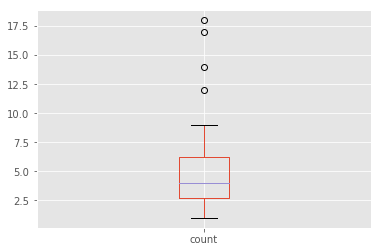

In [140]:
red_delayed['count'].resample('3T').sum().plot(kind='box')

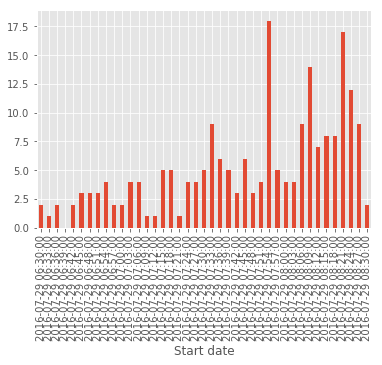

In [133]:
red_delayed['count'].resample('3T').sum().plot(kind='bar')

how do the actual numbers compare before and after the delay?

In [115]:
# figure out the number of rides before the delay
delay_rides_before = bikeshare_rides[str(delay_time - timedelta(hours=1)) : str(delay_time)]
red_delayed_before = delay_rides_before[delay_rides_before['Start station'].isin(bikes_close['RD'])]
nonred_delayed_before = delay_rides_before[~delay_rides_before['Start station'].isin(bikes_close['RD'])]

# figure out the number of rides after the delay

delay_rides_after = bikeshare_rides[str(delay_time) : str(delay_time + timedelta(hours=1))]
red_delayed_after = delay_rides_after[delay_rides_after['Start station'].isin(bikes_close['RD'])]
nonred_delayed_after = delay_rides_after[~delay_rides_after['Start station'].isin(bikes_close['RD'])]

print('red_delayed_before', len(red_delayed_before))
print('nonred_delayed_before', len(nonred_delayed_before))
print('red_delayed_after', len(red_delayed_after))
print('nonred_delayed_after', len(nonred_delayed_after))

red_delayed_before 55
nonred_delayed_before 358
red_delayed_after 158
nonred_delayed_after 870


The after delay is 2.9 times larger than the before delay count

There is an increase after 7:30, but how do we know it is because of the delay and not just because 7:30-8:30 is more popular time to ride than 6:30-7:30?  
### Compare this plot to one generated for a day with no delay (2016-07-29 + 7 days)

In [95]:
nodelay_time = delay_time + timedelta(days=7)
nodelay_time

Timestamp('2016-08-05 07:30:00')

Make sure there were no significant delays during rush hour on this day  
there was a 6 minute delay at 7:23am

In [96]:
metro_delays['2016-08-05']

,Date,Incident,Line,Direction,Cause,Delay,time_stamp
Time,,,,,,,
2016-08-05 06:04:00,8/5/2016,A Largo Town Center-bound Blue Line train at ...,Blue,Largo Town Center,did not operate,8.0,8/5/2016 6:04 am
2016-08-05 06:16:00,8/5/2016,A Largo Town Center-bound Blue Line train at ...,Blue,Largo Town Center,did not operate,8.0,8/5/2016 6:16 am
2016-08-05 06:20:00,8/5/2016,A Vienna-bound Orange Line train at New Carro...,Orange,Vienna,did not operate,6.0,8/5/2016 6:20 am
2016-08-05 06:57:00,8/5/2016,A Branch Avenue-bound Green Line train at Gre...,Green,Branch Avenue,did not operate,6.0,8/5/2016 6:57 am
2016-08-05 06:58:00,8/5/2016,A Vienna-bound Orange Line train at New Carro...,Orange,Vienna,did not operate,6.0,8/5/2016 6:58 am
2016-08-05 07:00:00,8/5/2016,A Wiehle-Reston East-bound Silver Line train ...,Silver,Wiehle-Reston East,did not operate,6.0,8/5/2016 7:00 am
2016-08-05 07:12:00,8/5/2016,A Vienna-bound Orange Line train at New Carro...,Orange,Vienna,did not operate,6.0,8/5/2016 7:12 am
2016-08-05 07:12:00,8/5/2016,A Wiehle-Reston East-bound Silver Line train ...,Silver,Wiehle-Reston East,did not operate,6.0,8/5/2016 7:12 am
2016-08-05 07:23:00,8/5/2016,A Glenmont-bound Red Line train at Shady Grov...,Red,Glenmont,did not operate,6.0,8/5/2016 7:23 am


In [97]:
nodelay_rides_all = bikeshare_rides[str(nodelay_time - timedelta(hours=1)) : str(nodelay_time + timedelta(hours=1))]
nodelay_rides_all 

,Duration (ms),End date,Start station number,Start station,End station number,End station,Bike number,Member Type
Start date,,,,,,,,
2016-08-05 08:30:00,1540794,8/5/2016 8:55,31258,Lincoln Memorial,31627,M St & Delaware Ave NE,W00793,Registered
2016-08-05 08:30:00,980207,8/5/2016 8:46,31267,17th St & Massachusetts Ave NW,31228,8th & H St NW,W22527,Registered
2016-08-05 08:30:00,183179,8/5/2016 8:33,31109,7th & T St NW,31281,8th & O St NW,W00413,Registered
2016-08-05 08:30:00,556511,8/5/2016 8:39,31512,Neal St & Trinidad Ave NE,31623,Columbus Circle / Union Station,W21962,Registered
2016-08-05 08:30:00,276117,8/5/2016 8:34,32029,Offutt Ln & Chevy Chase Dr,32013,Montgomery & East Ln,W21432,Registered
2016-08-05 08:30:00,1146302,8/5/2016 8:49,31306,39th & Calvert St NW / Stoddert,31279,19th & G St NW,W01025,Registered
2016-08-05 08:30:00,581824,8/5/2016 8:40,31248,Smithsonian / Jefferson Dr & 12th St SW,31261,21st St & Constitution Ave NW,W21531,Registered
2016-08-05 08:30:00,163929,8/5/2016 8:33,31039,Wilson Blvd & N Quincy St,31034,N Randolph St & Fairfax Dr,W21644,Registered
2016-08-05 08:30:00,1219273,8/5/2016 8:50,31246,M St & Pennsylvania Ave NW,31219,10th St & Constitution Ave NW,W20102,Registered


In [98]:
red_nondelayed = nodelay_rides_all[nodelay_rides_all['Start station'].isin(bikes_close['RD'])]
nonred_nondelayed = nodelay_rides_all[~nodelay_rides_all['Start station'].isin(bikes_close['RD'])]

In [99]:
print(len(red_nondelayed))
print(len(nonred_nondelayed))
print(red_nondelayed.groupby('Member Type')['Member Type'].count())

246
1329
Member Type
Casual         17
Registered    229
Name: Member Type, dtype: int64


In [100]:
red_nondelayed['count'] = 1

/Users/DDT1-Old/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


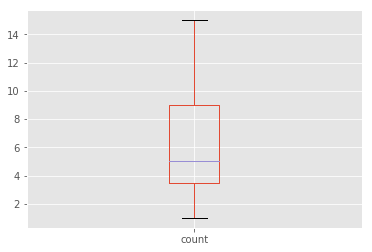

In [137]:
red_nondelayed['count'].resample('3T').sum().plot(kind ='box')

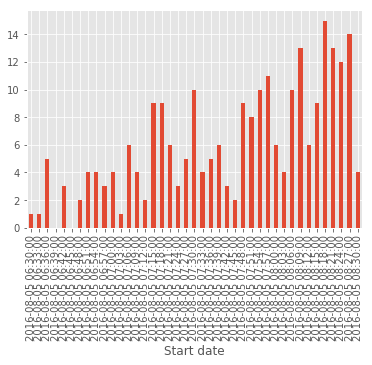

In [136]:
red_nondelayed['count'].resample('3T').sum().plot(kind ='bar')

There is not an obvious difference based on the presence of a delay. Perhaps there is a larger 'change' on the day with the delay where as the day with no delay is just a gradual increase.

In [117]:
# figure out the number of rides before the delay
nodelay_rides_before = bikeshare_rides[str(nodelay_time - timedelta(hours=1)) : str(nodelay_time)]
red_nondelayed_before = nodelay_rides_before[nodelay_rides_before['Start station'].isin(bikes_close['RD'])]
nonred_nondelayed_before = nodelay_rides_before[~nodelay_rides_before['Start station'].isin(bikes_close['RD'])]

# figure out the number of rides after the delay

nodelay_rides_after = bikeshare_rides[str(nodelay_time) : str(nodelay_time + timedelta(hours=1))]
red_nondelayed_after = nodelay_rides_after[nodelay_rides_after['Start station'].isin(bikes_close['RD'])]
nonred_nondelayed_after = nodelay_rides_after[~nodelay_rides_after['Start station'].isin(bikes_close['RD'])]

print('red_nondelayed_before', len(red_nondelayed_before))
print('nonred_nondelayed_before', len(nonred_nondelayed_before))
print('red_nondelayed_after', len(red_nondelayed_after))
print('nonred_nondelayed_after', len(nonred_nondelayed_after))

red_nondelayed_before 74
nonred_nondelayed_before 432
red_nondelayed_after 174
nonred_nondelayed_after 908


red rides after delay time is 2.4 times larger than before delay time on non-delay day
# Check a second delay on a different line

In [128]:
orange_delays = metro_delays[metro_delays['Line'] == 'Orange']
orange_delays

,Date,Incident,Line,Direction,Cause,Delay,time_stamp
Time,,,,,,,
2016-09-23 16:00:00,9/23/2016,A Vienna-bound Orange Line train at Potomac A...,Orange,Vienna,a brake problem,38.0,9/23/2016 4:00 pm
2016-09-22 06:04:00,9/22/2016,A Vienna-bound Orange Line train at New Carro...,Orange,Vienna,a brake problem,36.0,9/22/2016 6:04 am
2016-09-17 07:00:00,9/17/2016,A Vienna-bound Orange Line train at New Carro...,Orange,Vienna,a 3rd rail power problem,32.0,9/17/2016 7:00 am
2016-09-11 23:43:00,9/11/2016,A Vienna-bound Orange Line train at Landover ...,Orange,Vienna,striking a deer,33.0,9/11/2016 11:43 pm
2016-09-04 14:16:00,9/4/2016,A Vienna-bound Orange Line train at McPherson...,Orange,Vienna,a signal problem,42.0,9/4/2016 2:16 pm
2016-08-26 05:00:00,8/26/2016,A Vienna-bound Orange Line train at New Carro...,Orange,Vienna,unscheduled track work,31.0,8/26/2016 5:00 am
2016-08-08 05:20:00,8/8/2016,A Vienna-bound Orange Line train at West Fall...,Orange,Vienna,a signal problem,37.0,8/8/2016 5:20 am
2016-07-31 21:18:00,7/31/2016,A New Carrollton-bound Orange Line train at D...,Orange,New Carrollton-bound Orange Line train at Dunn...,a brake problem,39.0,7/31/2016 9:18 pm
2016-07-20 12:50:00,7/20/2016,A Vienna-bound Orange Line train at Ballston-...,Orange,Vienna,a brake problem,43.0,7/20/2016 12:50 pm


In [131]:
pd.to_datetime('2016-07-12 07:00:00').weekday_name

'Tuesday'